<a href="https://colab.research.google.com/github/Shujah-Butt/Freelancing-Projects/blob/main/Task_2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Customer Segmentation

**Objective:** Segment mall customers based on their income and spending score using clustering algorithms.

**Dataset:** [Mall Customers Dataset - Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn

**Steps:**
1. Load and explore the dataset
2. Preprocess the data (e.g., scaling)
3. Apply K-Means clustering
4. Determine optimal number of clusters (Elbow method)
5. Visualize the clusters
6. Optional: Try DBSCAN or analyze average spending per cluster


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Load the dataset
# Replace with your path or mount if using Google Drive
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


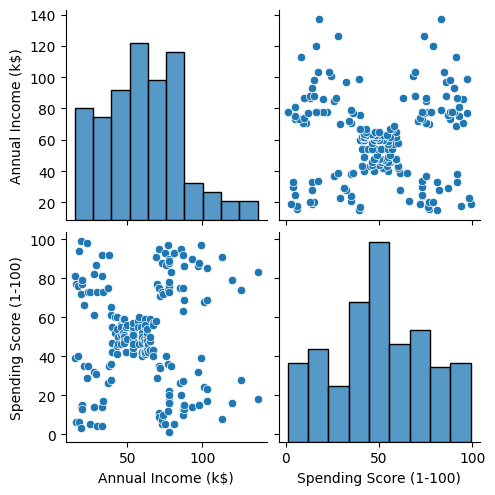

In [ ]:
# Step 3: Basic data exploration
df.info()
df.describe()
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
# Step 4: Data preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

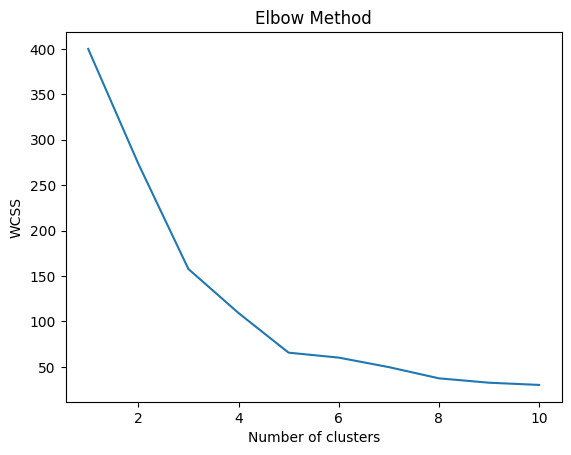

In [ ]:
# Step 5: Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

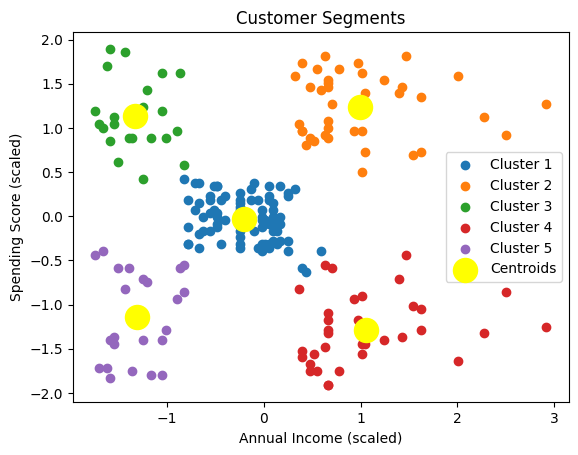

In [ ]:
# Step 6: Apply KMeans and visualize clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

## 🔍 Bonus: DBSCAN Clustering & Average Spending Analysis

**Objective:** Apply DBSCAN clustering and analyze average spending per cluster.

- DBSCAN is a density-based clustering algorithm.
- This method doesn't require specifying the number of clusters.


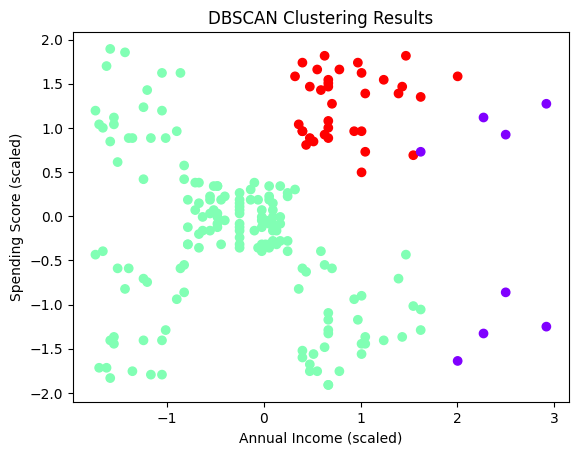

In [ ]:
# Apply DBSCAN clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [ ]:
# Add DBSCAN labels to the original dataset and analyze average spending
df['DBSCAN_Cluster'] = dbscan_labels
avg_spending = df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean().reset_index()
print('Average Spending Score per DBSCAN Cluster:')
print(avg_spending)

Average Spending Score per DBSCAN Cluster:
   DBSCAN_Cluster  Spending Score (1-100)
0              -1               46.875000
1               0               43.101911
2               1               82.800000
